In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
import datetime
#sns.set(color_codes=True)
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import statistics as st
sns.set_style('whitegrid', {'axes.linewidth' : 0.5})
from statsmodels.distributions.empirical_distribution import ECDF
import scipy
import gc

from helpers import *

In [2]:
import epyestim
import epyestim.covid19 as covid19

In [3]:
today_str = dt.datetime.today().strftime('%y%m%d')

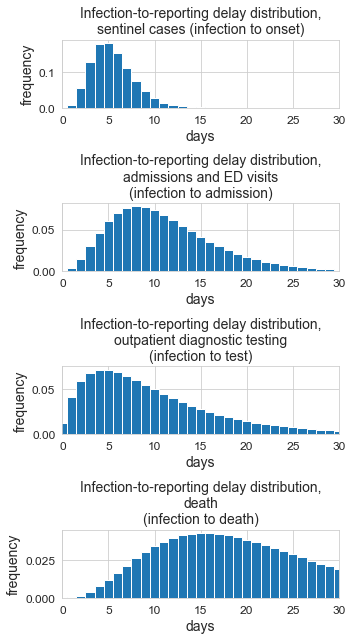

In [4]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(5,9))
alpha = 1
# Panel A (sentinel) ###################################################
my_continuous_distrb = scipy.stats.gamma(a=5.807, scale=0.948)
my_discrete_distrb = epyestim.discrete_distrb(my_continuous_distrb)
sc_distrb = my_discrete_distrb
axes[0].bar(range(len(my_discrete_distrb)), my_discrete_distrb, width=1, alpha=alpha)
axes[0].set_xlim([0,30])
axes[0].set_title('Infection-to-reporting delay distribution,\nsentinel cases (infection to onset)', fontsize=14)
axes[0].set_xlabel('days', fontsize=14)

# Panel B (hospital & ED) ###################################################
alpha1 = 5.807
theta1 = 0.948
#print(alpha1*theta1)
alpha2 = 1.104 #5.074 
theta2 = 5.074 #1.104
#print(alpha2*theta2)
k_sum = (alpha1*theta1 + alpha2*theta2)**2/((alpha1*theta1**2) + (alpha2*theta2**2))
theta_sum = (alpha1*theta1 + alpha2*theta2)/k_sum

k_sum = (alpha1*theta1 + alpha2*theta2)**2/((alpha1*theta1**2) + (alpha2*theta2**2))
theta_sum = (alpha1*theta1 + alpha2*theta2)/k_sum

#print(k_sum, theta_sum)
#print(k_sum*theta_sum)

my_continuous_distrb = scipy.stats.gamma(a=k_sum, scale=theta_sum)
my_discrete_distrb = epyestim.discrete_distrb(my_continuous_distrb)
#my_discrete_distrb = covid19.generate_standard_infection_to_reporting_distribution()
cli_distrb = my_discrete_distrb
axes[1].bar(range(len(my_discrete_distrb)), my_discrete_distrb, width=1, alpha=alpha)
axes[1].set_xlim([0,30])
axes[1].set_title('Infection-to-reporting delay distribution,\nadmissions and ED visits\n(infection to admission)', fontsize=14)
axes[1].set_xlabel('days', fontsize=14)

# Panel C (cases) ###################################################
case_distrb = covid19.generate_standard_infection_to_reporting_distribution()
my_discrete_distrb = case_distrb
axes[2].bar(range(len(my_discrete_distrb)), my_discrete_distrb, width=1, alpha=alpha)
axes[2].set_xlim([0,30])
axes[2].set_title('Infection-to-reporting delay distribution,\noutpatient diagnostic testing\n(infection to test)', fontsize=14)
axes[2].set_xlabel('days', fontsize=14)

# Panel D (death) ###################################################

alpha1 = 5.807
theta1 = 0.948
#print(alpha1*theta1)
alpha2 = 2.2 #5.074 
theta2 = 15.2/2.2 #1.104
#print(alpha2*theta2)
k_sum = (alpha1*theta1 + alpha2*theta2)**2/((alpha1*theta1**2) + (alpha2*theta2**2))
theta_sum = (alpha1*theta1 + alpha2*theta2)/k_sum

k_sum = (alpha1*theta1 + alpha2*theta2)**2/((alpha1*theta1**2) + (alpha2*theta2**2))
theta_sum = (alpha1*theta1 + alpha2*theta2)/k_sum

my_continuous_distrb = scipy.stats.gamma(a=k_sum, scale=theta_sum)
my_discrete_distrb = epyestim.discrete_distrb(my_continuous_distrb)
#my_discrete_distrb = covid19.generate_standard_infection_to_reporting_distribution()
death_distrb = my_discrete_distrb
axes[3].bar(range(len(my_discrete_distrb)), my_discrete_distrb, width=1, alpha=alpha)
axes[3].set_xlim([0,30])
axes[3].set_title('Infection-to-reporting delay distribution,\ndeath\n(infection to death)', fontsize=14)
axes[3].set_xlabel('days', fontsize=14)


#print(k_sum, theta_sum)
#print(k_sum*theta_sum)
for ax in axes:
    ax.tick_params(axis='both', labelsize=12)
    ax.set_ylabel('frequency', fontsize=14)

#fig.text(y=0.95, x=0.05, s='A', va='center', ha='center', fontsize=16, weight='bold')
#fig.text(y=0.65, x=0.05, s='B', va='center', ha='center', fontsize=16, weight='bold')
#fig.text(y=0.31, x=0.05, s='C', va='center', ha='center', fontsize=16, weight='bold')
fig.tight_layout()

In [5]:
print(med_and_iqr(sc_distrb))
print(med_and_iqr(case_distrb))
print(med_and_iqr(cli_distrb))
print(med_and_iqr(death_distrb))

(5, (4, 7))
(8, (4, 14))
(10, (7, 14))
(19, (13, 27))


meta NOT subset; don't know how to subset; dropped


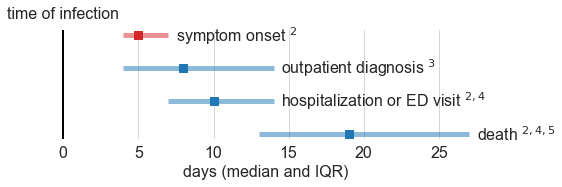

In [6]:
fig = plt.figure(figsize=(8,2))
ax = plt.gca()
i = 3
for obj, i, c, label in zip([med_and_iqr(sc_distrb), med_and_iqr(case_distrb), 
                             med_and_iqr(cli_distrb), med_and_iqr(death_distrb)], 
                  np.arange(3,-1,-1), 
                            [sns.color_palette()[3]]*1 + [sns.color_palette()[0]]*3,
                           [r'symptom onset $^2$', 
                            r'outpatient diagnosis $^3$', 
                            r'hospitalization or ED visit $^{2,4}$', 
                            r'death $^{2,4,5}$']):
    med, (p25, p75) = obj
    ax.errorbar(x=med, y=i, xerr=[[med-p25],[p75-med]], linewidth=5, alpha=0.5, color=c)
    ax.scatter(x=med, y=i, color=c, marker='s', s=80, edgecolor=None)
    ax.text(s=label, x=p75+0.5, y=i, ha='left', va='center', fontsize=16)
    
ax.tick_params(labelsize=16) 
ax.set_yticks([])
ax.set_xlabel('days (median and IQR)', fontsize=16)
for pos in ['bottom', 'left', 'top', 'right']:
    ax.spines[pos].set_visible(False)
    
ax.axvline(0, color='k', linewidth=2)
ax.grid(axis='y', alpha=0.01)
#ax.grid(False)
ax.text(s='time of infection', x=0, y=3.5, ha='center', fontsize=16)

fig.savefig('time_to_indicator_' + today_str + '.png', dpi=200, bbox_inches='tight')
fig.savefig('time_to_indicator_' + today_str + '.pdf', bbox_inches='tight')

In [7]:
np.array(med_and_iqr(sc_distrb)[1]).reshape(-1,1)

array([[4],
       [7]])

In [8]:
np.arange(3,-1,-1)

array([3, 2, 1, 0])

In [9]:
[sns.color_palette()[0]]*3 + [sns.color_palette()[3]]

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)]